In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# ***DATA CLEANING***

In [5]:
#check null value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [7]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [8]:
df.loc[5541,'duration'] = '74 min'
df.loc[5541,'rating']= np.nan
df.loc[5794,'duration'] = '84 min'
df.loc[5794,'rating']= np.nan
df.loc[5813,'duration'] = '66 min'
df.loc[5813,'rating']= np.nan


In [9]:
df.drop(['director','cast'],axis = 1,inplace = True,errors = 'ignore')

In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [13]:
df[df['date_added'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
df = df[df['date_added'].notna()]
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   country       8797 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8797 non-null   int64 
 6   rating        8797 non-null   object
 7   duration      8797 non-null   object
 8   listed_in     8797 non-null   object
 9   description   8797 non-null   object
dtypes: int64(1), object(9)
memory usage: 756.0+ KB


In [16]:
df['type']=df['type'].astype('category')
df['date_added']= df['date_added'].astype('datetime64')
df['type'].dtype
df['date_added'].dtype
df.info()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   category      
 2   title         8797 non-null   object        
 3   country       8797 non-null   object        
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8797 non-null   int64         
 6   rating        8797 non-null   object        
 7   duration      8797 non-null   object        
 8   listed_in     8797 non-null   object        
 9   description   8797 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(7)
memory usage: 696.0+ KB


In [17]:
country_counts = df['country'].value_counts(sort=True)
country_df = pd.DataFrame(country_counts)
country_df = country_df.reset_index()
country_df.columns = ['country', 'counts']
country_df

,country,counts
0,United States,3642
1,India,972
2,United Kingdom,418
3,Japan,244
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


In [18]:
#check dup
df.duplicated().sum()

0

In [19]:
#create month_added and year_added
df['month_added'] = df['date_added'].apply(lambda x: x.strftime("%B"))
df['year_added'] = df['date_added'].apply(lambda x:x.year).copy()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df['country']= df['country'].apply(lambda x: x.split(',')[0])
df


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [21]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [22]:
df['rating_ages']= df['rating'].replace(rating_ages).copy()
df['rating_ages']= df['rating_ages'].astype('category')
df['rating_ages'].dtype
df.sample(2)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
8534,s8535,Movie,The Tribes of Palos Verdes,United States,2019-12-01,2017,R,104 min,"Dramas, Independent Movies, Sports Movies",When a move to an exclusive seaside community ...,December,2019,Adults
2191,s2192,Movie,Retablo,Peru,2020-07-30,2017,TV-MA,102 min,"Dramas, International Movies","High in the Andes, a teenage boy and his fathe...",July,2020,Adults


# DATA VISUALIZATON

In [23]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types in this dataset such as {}... \n".format(len(df.type.unique()),
                                                                           ", ".join(df.type.unique()[0:2])))

print("There are {} countries producing in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 8797 observations and 13 features in this dataset. 

There are 2 types in this dataset such as Movie, TV Show... 

There are 86 countries producing in this dataset such as United States, South Africa, India, United Kingdom, Germany... 



In [24]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Adults
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,Adults


In [25]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

Trong 8797 bộ phim có 6131 là Movie còn lại 2666 thuộc thể loại TVshow.

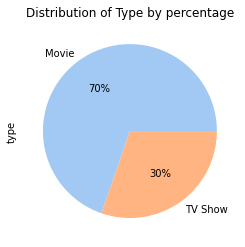

In [26]:
plt.title('Distribution of Type by percentage')
color = sns.color_palette('pastel')
df['type'].value_counts().plot(kind='pie',autopct='%.0f%%', colors=color)
plt.show()

 Movie chiếm đến 70%, còn lại TV show chiếm 30% số lượng phim có trên Netflix

In [27]:
count = df.groupby('country')['show_id'].count().reset_index()
count.sort_values(['show_id'],ascending=[False])


,country,show_id
80,United States,4035
30,India,1008
79,United Kingdom,627
11,Canada,271
37,Japan,258
...,...,...
47,Namibia,1
66,Somalia,1
65,Slovenia,1
53,Paraguay,1


United States     4035
India             1008
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: country, dtype: int64


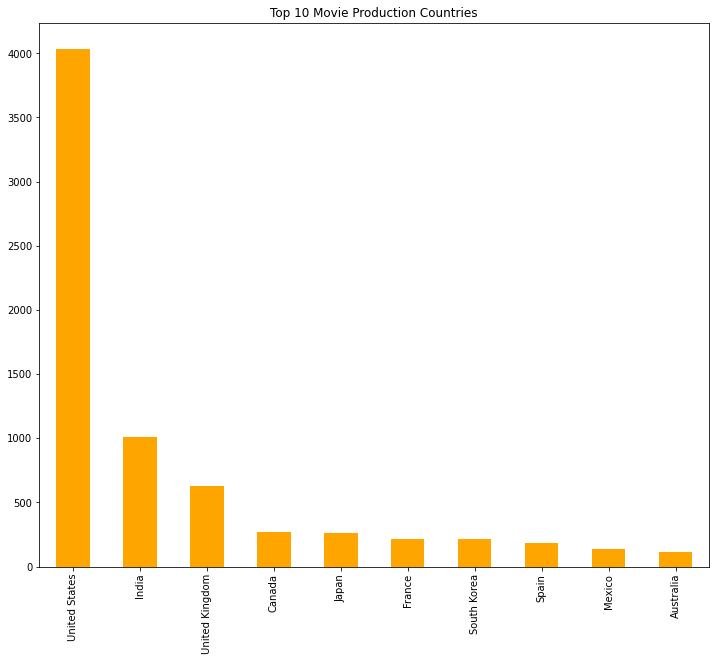

In [28]:
print(df.country.value_counts()[:10])
plt.figure(figsize=(12,10))
df.country.value_counts()[:10].plot.bar(color = 'orange')
plt.title('Top 10 Movie Production Countries')
plt.show() 

Top 10 quốc gia sản xuất nhiều phim nhất trên nền tảng Netflix. Trong đó USA chiếm phần lớn lượng phim (4035) đã sản xuất theo sau đó là Ấn Độ.

In [29]:
df['rating_ages'].value_counts()

Adults        4096
Teens         2647
Older Kids    1487
Kids           567
Name: rating_ages, dtype: int64

In [30]:

rating_counts= df['rating_ages'].value_counts()
rating_df = pd.DataFrame(rating_counts)
rating_df = rating_df.reset_index()
rating_df.columns =['rating_ages','counts']



([<matplotlib.patches.Wedge at 0x7f627dbd3e50>,
 [Text(0.11860098928333727, 1.0935875846684682, 'Adults'),
  Text(-0.8202484285544189, -0.7329341822114769, 'Teens'),
  Text(0.6523026232942527, -0.8857207729546804, 'Older Kids'),
  Text(1.0775262917733135, -0.22121729258186867, 'Kids')],
 [Text(0.06469144870000214, 0.5965023189100734, '47%'),
  Text(-0.4474082337569557, -0.3997822812062601, '30%'),
  Text(0.35580143088777416, -0.4831204216116438, '17%'),
  Text(0.5877416136945346, -0.12066397777192836, '6%')])

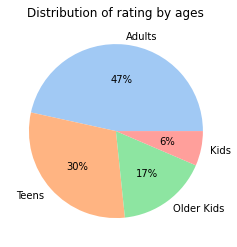

In [31]:
color = sns.color_palette('pastel')
plt.title('Distribution of rating by ages')
plt.pie(rating_df['counts'],labels = rating_df['rating_ages'],colors =color,autopct='%.0f%%')

Độ tuổi cho phép người dùng của các movie/show có mặt trên Netflix

Trong đó: người lớn chiếm đến 47% và Thanh thiếu niên chiếm 30%. Đây đang là hai đối tượng khách hàng đang được Netflix hướng đến phát triển


<AxesSubplot:xlabel='rating_ages', ylabel='count'>

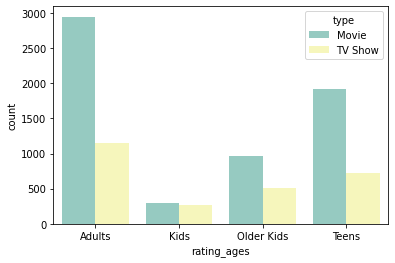

In [32]:
sns.countplot(x=df['rating_ages'],data=df,hue='type', palette ='Set3')

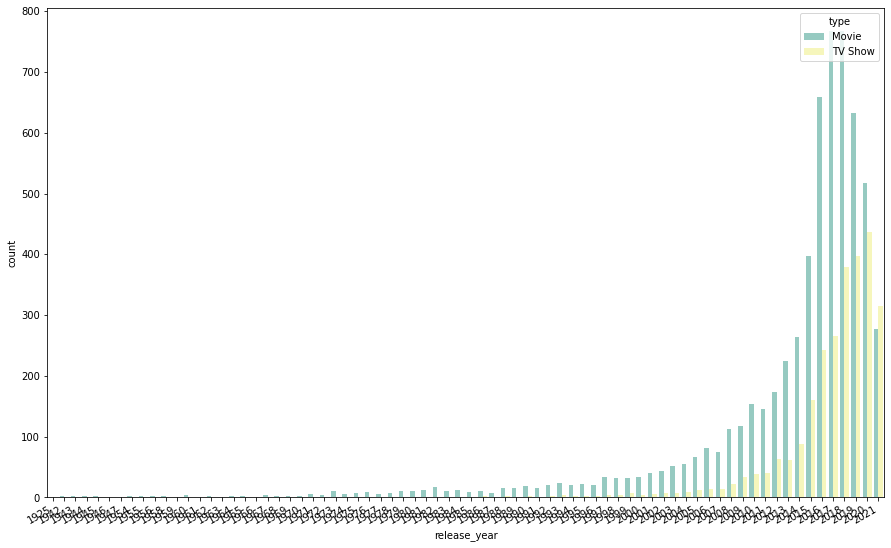

In [33]:
plt.figure(figsize=(15,10))

g = sns.countplot(x=df['release_year'],data=df, hue='type', palette="Set3")
g.figure.autofmt_xdate()

Những năm gần đây Netflix có xu hướng phát hành TVshow tăng và số lượng movie bắt đầu giảm, ở giai đoạn 2019-2021 lượng phim giảm một phần do ảnh hưởng của covid19.

2018 là năm có nhiều phim được phát hành nhất.

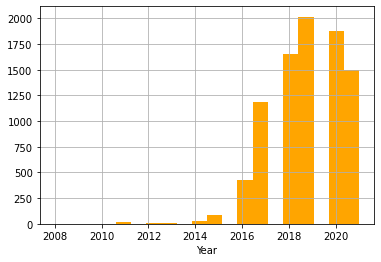

In [34]:
plt.title('')
plt.xlabel('Year')
plt.ylabel('')
plt.hist(x=df['year_added'],bins=20,color = 'orange')
plt.grid(True)
plt.show()

2008 Netflix thành lập, các bộ phim bắt đầu được thêm vào nền tảng
Từ 2015 lượng phim được thêm vào bắt đầu tăng nhanh. Các phim được thêm vào Netflix khá đồng đều từ nằm 2017-2021.

In [35]:
tvshow_df = df[df['type'] == 'TV Show'].copy()
tvshow_df


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Adults
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,Adults
5,s6,TV Show,Midnight Mass,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Japan,2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,May,2018,Older Kids
8796,s8797,TV Show,Yunus Emre,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",January,2017,Older Kids
8797,s8798,TV Show,Zak Storm,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,September,2018,Older Kids
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",December,2016,Older Kids


In [36]:
movie_df = df[df['type']== 'Movie'].copy()
movie_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens
6,s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021,Older Kids
7,s8,Movie,Sankofa,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021,Adults
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,2021,Teens
12,s13,Movie,Je Suis Karl,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,2021,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,United Arab Emirates,2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,March,2016,Adults
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019,Adults
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019,Adults
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020,Older Kids


In [37]:
movie_df["duration"]= movie_df.duration.str.replace(" min",'').astype(int)


In [38]:
tvshow_df['duration'] = tvshow_df.duration.str.replace('Seasons','')
tvshow_df['duration'] = tvshow_df.duration.str.replace('Season','').astype(int)

In [39]:
tvshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2666 non-null   object        
 1   type          2666 non-null   category      
 2   title         2666 non-null   object        
 3   country       2666 non-null   object        
 4   date_added    2666 non-null   datetime64[ns]
 5   release_year  2666 non-null   int64         
 6   rating        2666 non-null   object        
 7   duration      2666 non-null   int64         
 8   listed_in     2666 non-null   object        
 9   description   2666 non-null   object        
 10  month_added   2666 non-null   object        
 11  year_added    2666 non-null   int64         
 12  rating_ages   2666 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(3), object(7)
memory usage: 255.5+ KB


1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64


Text(0.5, 0, 'Number of season')

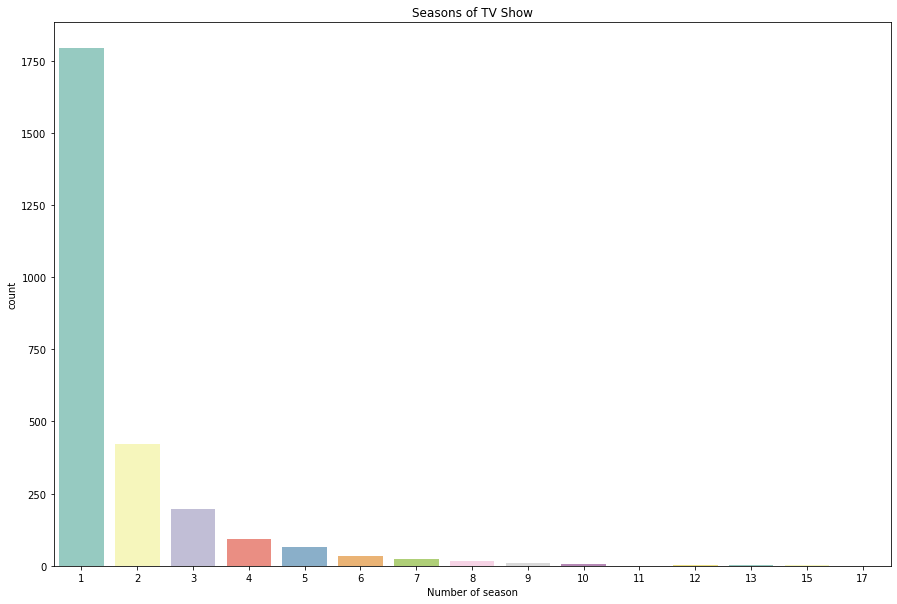

In [40]:
print(tvshow_df.duration.value_counts() )
plt.figure(figsize=(15,10))
plt.title('Seasons of TV Show')

sns.countplot(x = tvshow_df['duration'], palette="Set3")
plt.xlabel('Number of season')
#g.figure.autofmt_xdate()

Gần 1800 TVshow chỉ có 1 mùa duy nhất 
17 mùa là số mùa dài nhất trên netflix và chỉ có 1 TVshow duy nhất.

In [41]:
movie_df.describe()

,release_year,duration,year_added
count,6131.000000,6131.000000,6131.000000
mean,2013.121514,99.564998,2018.849290
std,9.678169,28.289504,1.561922
min,1942.000000,3.000000,2008.000000
25%,2012.000000,87.000000,2018.000000
50%,2016.000000,98.000000,2019.000000
75%,2018.000000,114.000000,2020.000000
max,2021.000000,312.000000,2021.000000


In [42]:
movie_df[movie_df["duration"]==3]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
3777,s3778,Movie,Silent,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",June,2019,Kids


In [43]:
movie_df[movie_df["duration"]==312]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,rating_ages
4253,s4254,Movie,Black Mirror: Bandersnatch,United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",December,2018,Adults


Thời lượng trung bình của một bộ phim là 99.56 phút. Bộ phim 'Silent' là bộ phim hoạt hình có thời lượng ngắn nhất 3 phút.
Bộ phim dài nhất là 'Black Mirror: Bandersnatch' với thời lượng lên đến 312'.

90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: duration, Length: 205, dtype: int64



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


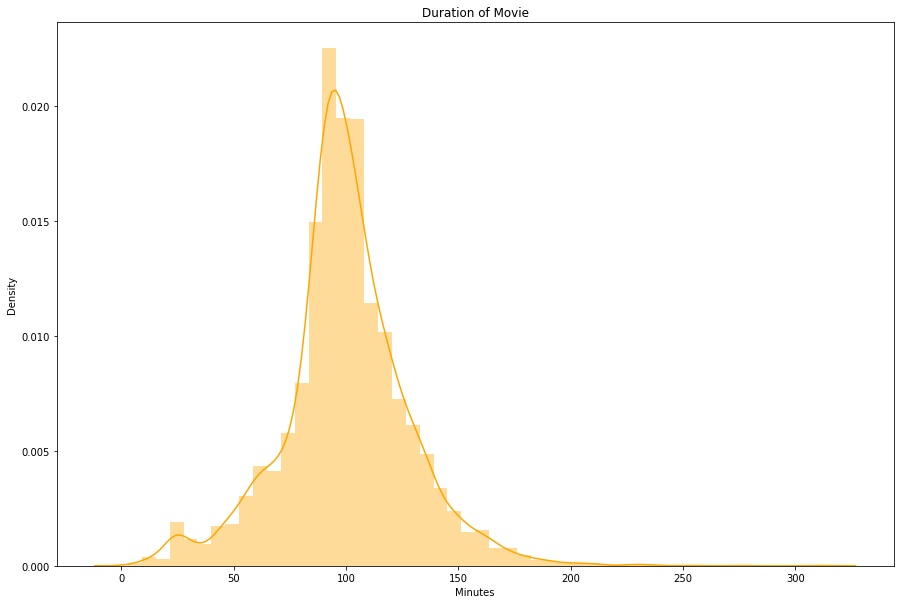

In [44]:
print(movie_df.duration.value_counts())
plt.figure(figsize = (15,10))
plt.title('Duration of Movie')
plt.xlabel('Minutes')
sns.distplot(x = movie_df['duration'], color = 'orange')
print()

<AxesSubplot:title={'center':'Top 10 Genres for TV shows'}, xlabel='count', ylabel='listed_in'>

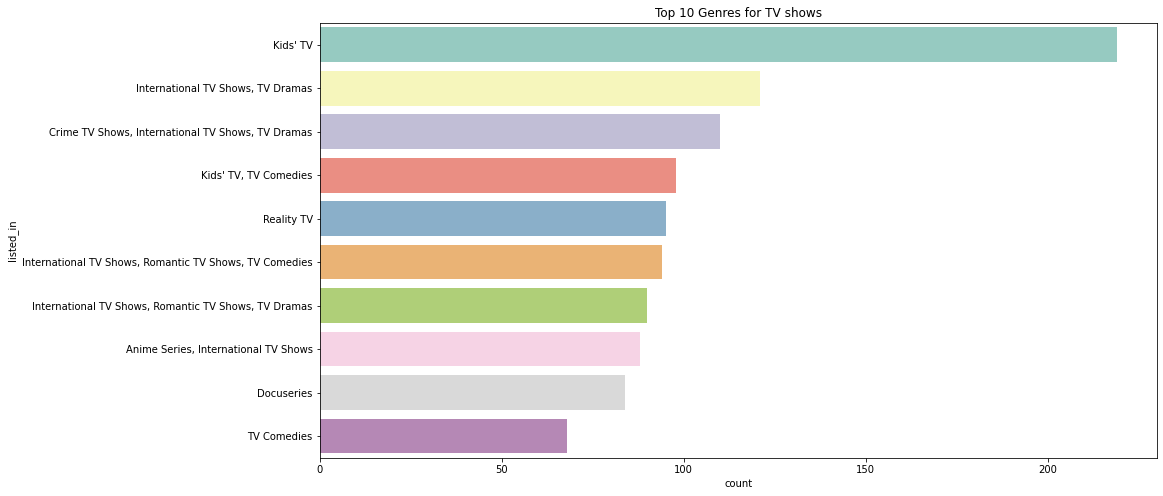

In [45]:

plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for TV shows')
sns.countplot(y="listed_in", data= tvshow_df,order = tvshow_df['listed_in'].value_counts().index[:10],palette="Set3")

In [46]:
from wordcloud import WordCloud

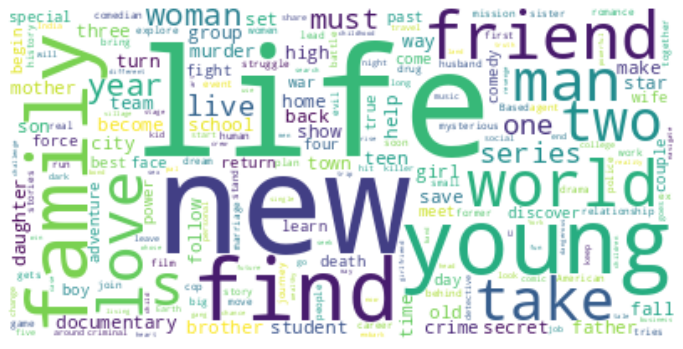

In [47]:
str1 = " ".join(description for description in df.description) 
plt.figure(figsize=[12,15])
plot_d = WordCloud( collocations = False, background_color = 'white', max_font_size = 90, max_words = 200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

Những từ phổ biến đáng chú ý trong mục mô tả phim

* Level 1: Life, New, Young, Family, Friend, Find
* Level 2: Love, Woman, Man, World, Live
* Level 3: Help, Father, Girl, Student, Documentary, Series, Home
